In [3]:
import pandas as pd
import re



In [4]:
# path syntax(/,\,../) changes with system and version, make sure to use the correct one

In [5]:
df = pd.read_json('data/problems_data.jsonl', lines=True)

In [6]:
df.to_csv('data/problem_data.csv',index=False)

In [7]:
df = pd.read_csv('data/problem_data.csv')
df.iloc[10]

,10
title,Hopper
description,A hopper is a virtual creature that visits Jav...
input_description,"The first line contains three numbers $n$, $D$..."
output_description,The output contains one line—the length of the...
sample_io,"[{'input': '8 3 1\n1 7 8 2 6 4 3 5', 'output':..."
problem_class,hard
problem_score,9.5
url,https://open.kattis.com/problems/hopper


In [8]:
df.describe()

,problem_score
count,4112.000000
mean,5.114689
std,2.177770
min,1.100000
25%,3.300000
50%,5.200000
75%,6.900000
max,9.700000


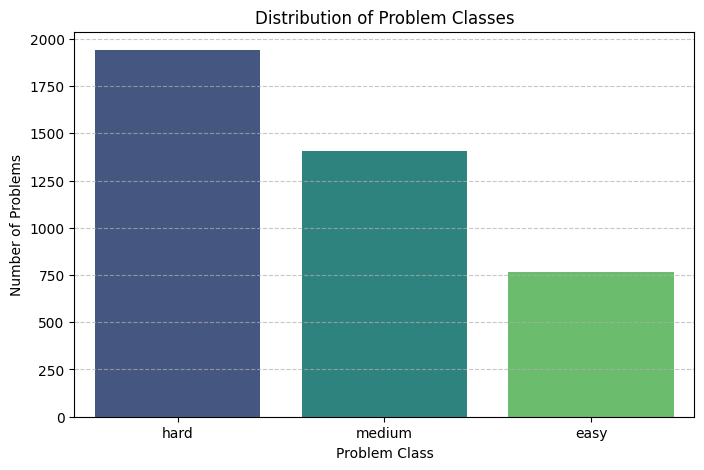

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='problem_class', hue='problem_class', palette='viridis', legend=False)
plt.title('Distribution of Problem Classes')
plt.xlabel('Problem Class')
plt.ylabel('Number of Problems')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
df.columns

Index(['title', 'description', 'input_description', 'output_description',
       'sample_io', 'problem_class', 'problem_score', 'url'],
      dtype='object')

In [11]:
df["problem_class"].value_counts()


,count
problem_class,
hard,1941
medium,1405
easy,766


In [12]:
df["problem_score"].describe()

,problem_score
count,4112.000000
mean,5.114689
std,2.177770
min,1.100000
25%,3.300000
50%,5.200000
75%,6.900000
max,9.700000


In [13]:
df.isnull().sum()


,0
title,0
description,81
input_description,120
output_description,131
sample_io,0
problem_class,0
problem_score,0
url,0


In [14]:
text_cols = [
    "title",
    "description",
    "input_description",
    "output_description"
]

for col in text_cols:
    df[col] = df[col].fillna("")


In [15]:
df.isnull().sum()

,0
title,0
description,0
input_description,0
output_description,0
sample_io,0
problem_class,0
problem_score,0
url,0


In [16]:
df = df.drop(columns=["url"])

In [17]:
df["full_text"] = (
    df["title"] + " " +
    df["description"] + " " +
    df["input_description"] + " " +
    df["output_description"]
)

df["full_text"].head(5)


,full_text
0,Uuu Unununium (Uuu) was the name of the chemic...
1,House Building A number of eccentrics from cen...
2,Mario or Luigi Mario and Luigi are playing a g...
3,The Wire Ghost Žofka is bending a copper wire....
4,Barking Up The Wrong Tree Your dog Spot is let...


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9+\-*/=%<>\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()


In [19]:
df["clean_text"] = df["full_text"].apply(clean_text)

df[["full_text", "clean_text"]].head(5)


,full_text,clean_text
0,Uuu Unununium (Uuu) was the name of the chemic...,uuu unununium uuu was the name of the chemical...
1,House Building A number of eccentrics from cen...,house building a number of eccentrics from cen...
2,Mario or Luigi Mario and Luigi are playing a g...,mario or luigi mario and luigi are playing a g...
3,The Wire Ghost Žofka is bending a copper wire....,the wire ghost ofka is bending a copper wire s...
4,Barking Up The Wrong Tree Your dog Spot is let...,barking up the wrong tree your dog spot is let...


In [21]:
df.to_csv('data/preprocessed_data.csv', index=False)